# Libraries

In [54]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("Dataset/df_final.csv")
df.head()

,datetime,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,2008-05-05,1.726216,-1.0,-1.0,-1.0,0.017375,-0.570142,0.155627,-0.333053,0.596545,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2008-05-05,1.831347,0.0,-1.0,-1.0,-0.415017,-0.570142,0.155627,-0.333053,0.596545,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2008-05-05,-0.271273,-1.0,1.0,-1.0,-0.117748,-0.570142,0.155627,-0.333053,0.596545,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2008-05-05,0.044120,-1.0,-1.0,-1.0,-0.407296,-0.570142,0.155627,-0.333053,0.596545,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2008-05-05,1.726216,-1.0,-1.0,1.0,0.194964,-0.570142,0.155627,-0.333053,0.596545,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [56]:
df = df.drop(columns=['datetime'])

# Modeling with `duration` columns

## DT

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

result = {}

X = df.drop('y', axis=1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_model(model):
    start_time = time.time()
    model.fit(x_train,y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return y_pred, accuracy, train_time

In [58]:
dt = DecisionTreeClassifier(random_state=42)
y_pred, accuracy, train_time = train_model(dt)

result['Decision Tree'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result)

{'Decision Tree': {'Accuracy': 0.9049264235444657, 'Training time (s)': 0.12485694885253906}}


In [59]:
confusion_matrix(y_test, y_pred)

array([[6703,  371],
       [ 372,  369]])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      7074
         1.0       0.50      0.50      0.50       741

    accuracy                           0.90      7815
   macro avg       0.72      0.72      0.72      7815
weighted avg       0.90      0.90      0.90      7815



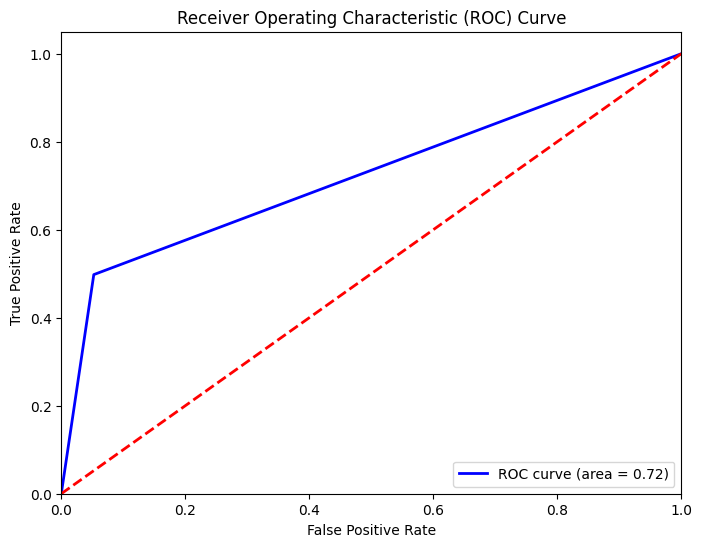

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## RF (Ensemble)

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
y_pred, accuracy, train_time = train_model(rf)

result['Random Forest'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result)

{'Decision Tree': {'Accuracy': 0.9049264235444657, 'Training time (s)': 0.12485694885253906}, 'Random Forest': {'Accuracy': 0.9200255918106206, 'Training time (s)': 1.6070961952209473}}


In [63]:
confusion_matrix(y_test, y_pred)

array([[6889,  185],
       [ 440,  301]])

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      7074
         1.0       0.62      0.41      0.49       741

    accuracy                           0.92      7815
   macro avg       0.78      0.69      0.72      7815
weighted avg       0.91      0.92      0.91      7815



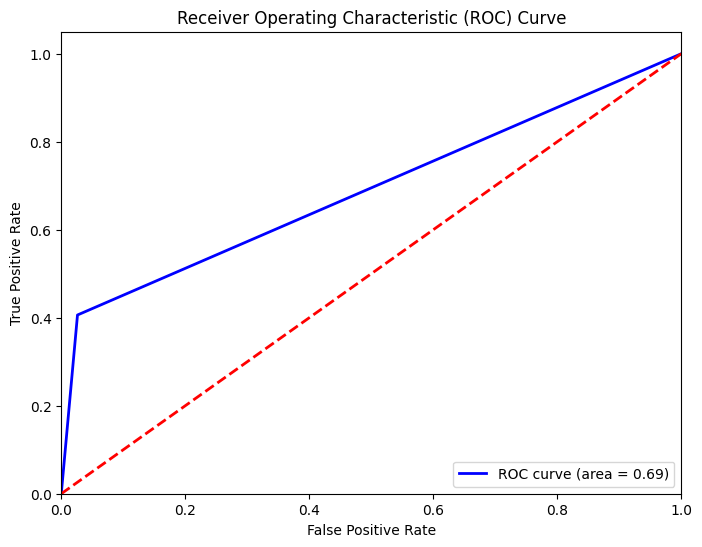

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Linear model (SVM)

In [66]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42)
y_pred, accuracy, train_time = train_model(svm)

result['SVM'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Decision Tree': {'Accuracy': 0.9049264235444657, 'Training time (s)': 0.12485694885253906}, 'Random Forest': {'Accuracy': 0.9200255918106206, 'Training time (s)': 1.6070961952209473}, 'SVM': {'Accuracy': 0.9182341650671785, 'Training time (s)': 0.9315280914306641}}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [67]:
confusion_matrix(y_test, y_pred)

array([[6965,  109],
       [ 530,  211]])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      7074
         1.0       0.66      0.28      0.40       741

    accuracy                           0.92      7815
   macro avg       0.79      0.63      0.68      7815
weighted avg       0.90      0.92      0.90      7815



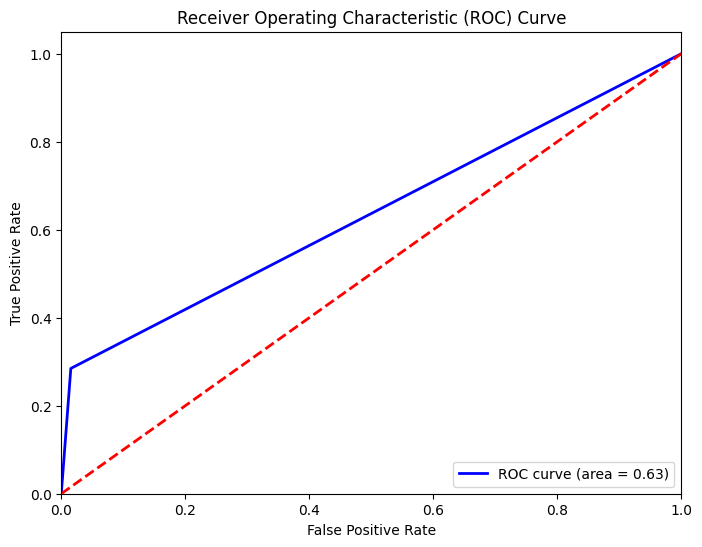

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost (boosting)

In [70]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=42)
y_pred, accuracy, train_time = train_model(xgb)

result['XGBoost'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result)

{'Decision Tree': {'Accuracy': 0.9049264235444657, 'Training time (s)': 0.12485694885253906}, 'Random Forest': {'Accuracy': 0.9200255918106206, 'Training time (s)': 1.6070961952209473}, 'SVM': {'Accuracy': 0.9182341650671785, 'Training time (s)': 0.9315280914306641}, 'XGBoost': {'Accuracy': 0.9207933461292387, 'Training time (s)': 1.7177491188049316}}


In [71]:
confusion_matrix(y_test, y_pred)

array([[6846,  228],
       [ 391,  350]])

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      7074
         1.0       0.61      0.47      0.53       741

    accuracy                           0.92      7815
   macro avg       0.78      0.72      0.74      7815
weighted avg       0.91      0.92      0.92      7815



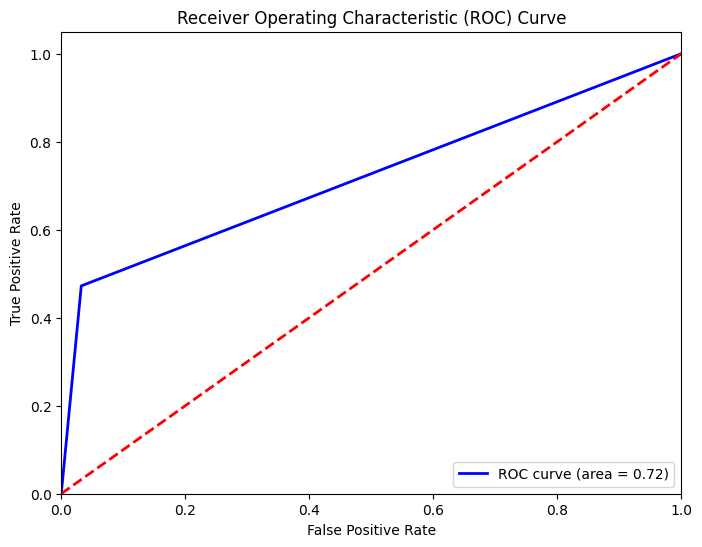

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Gradient Boost

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

gb = GradientBoostingClassifier(random_state=42)
y_pred, accuracy, train_time = train_model(gb)

result['Gradient Boost'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result)

{'Decision Tree': {'Accuracy': 0.9049264235444657, 'Training time (s)': 0.12485694885253906}, 'Random Forest': {'Accuracy': 0.9200255918106206, 'Training time (s)': 1.6070961952209473}, 'SVM': {'Accuracy': 0.9182341650671785, 'Training time (s)': 0.9315280914306641}, 'XGBoost': {'Accuracy': 0.9207933461292387, 'Training time (s)': 1.7177491188049316}, 'Gradient Boost': {'Accuracy': 0.9232245681381958, 'Training time (s)': 2.728994131088257}}


In [75]:
confusion_matrix(y_test, y_pred)

array([[6870,  204],
       [ 396,  345]])

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      7074
         1.0       0.63      0.47      0.53       741

    accuracy                           0.92      7815
   macro avg       0.79      0.72      0.75      7815
weighted avg       0.92      0.92      0.92      7815



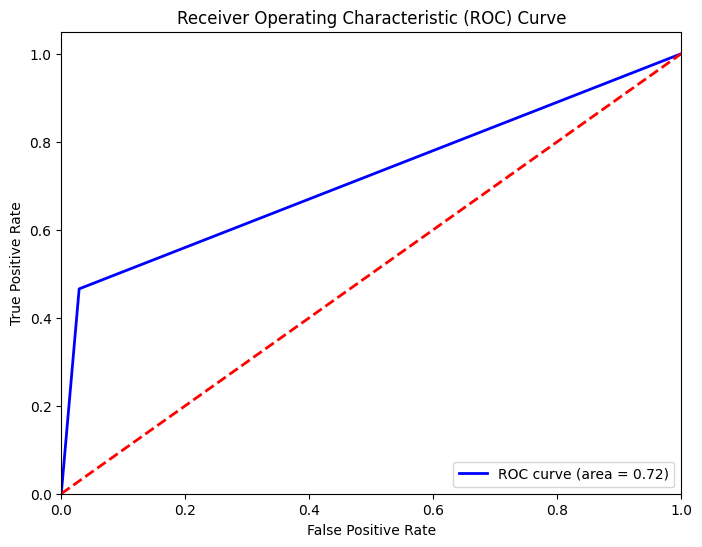

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [78]:
df_result = pd.DataFrame.from_dict(result, orient='index')
df_result.sort_values(by='Accuracy', ascending=False)

,Accuracy,Training time (s)
Gradient Boost,0.923225,2.728994
XGBoost,0.920793,1.717749
Random Forest,0.920026,1.607096
SVM,0.918234,0.931528
Decision Tree,0.904926,0.124857


# Modeling without `duration` columns

In [79]:
X = X.drop(columns=['duration'])

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
result_no_duration = {}

## DT

In [81]:
dt = DecisionTreeClassifier(random_state=42)
y_pred, accuracy, train_time = train_model(dt)

result_no_duration['Decision Tree'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result_no_duration)

{'Decision Tree': {'Accuracy': 0.8472168905950096, 'Training time (s)': 0.12879705429077148}}


In [82]:
confusion_matrix(y_test, y_pred)

array([[6435,  639],
       [ 555,  186]])

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      7074
         1.0       0.23      0.25      0.24       741

    accuracy                           0.85      7815
   macro avg       0.57      0.58      0.58      7815
weighted avg       0.85      0.85      0.85      7815



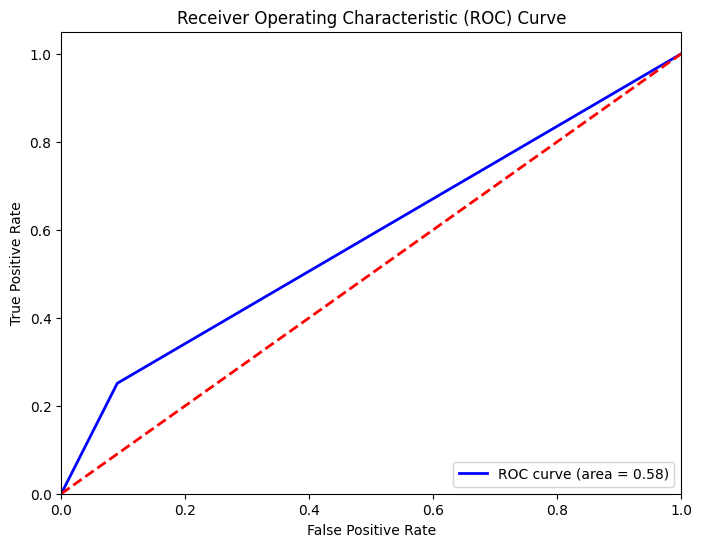

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## RF (Ensemble)

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
y_pred, accuracy, train_time = train_model(rf)

result_no_duration['Random Forest'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result_no_duration)

{'Decision Tree': {'Accuracy': 0.8472168905950096, 'Training time (s)': 0.12879705429077148}, 'Random Forest': {'Accuracy': 0.9062060140754958, 'Training time (s)': 1.6471879482269287}}


In [86]:
confusion_matrix(y_test, y_pred)

array([[6948,  126],
       [ 607,  134]])

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7074
         1.0       0.52      0.18      0.27       741

    accuracy                           0.91      7815
   macro avg       0.72      0.58      0.61      7815
weighted avg       0.88      0.91      0.89      7815



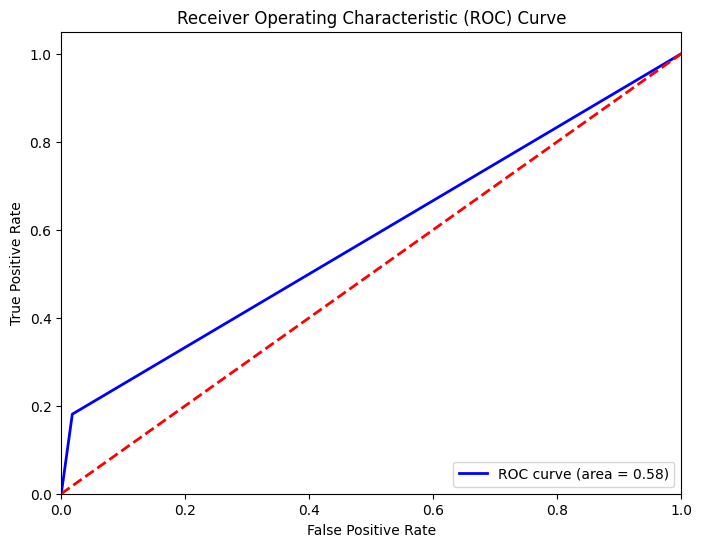

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Linear model (SVM)

In [89]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42)
y_pred, accuracy, train_time = train_model(svm)

result_no_duration['SVM'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result_no_duration)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'Decision Tree': {'Accuracy': 0.8472168905950096, 'Training time (s)': 0.12879705429077148}, 'Random Forest': {'Accuracy': 0.9062060140754958, 'Training time (s)': 1.6471879482269287}, 'SVM': {'Accuracy': 0.9110684580934101, 'Training time (s)': 1.4665238857269287}}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [90]:
confusion_matrix(y_test, y_pred)

array([[7036,   38],
       [ 657,   84]])

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      7074
         1.0       0.69      0.11      0.19       741

    accuracy                           0.91      7815
   macro avg       0.80      0.55      0.57      7815
weighted avg       0.89      0.91      0.88      7815



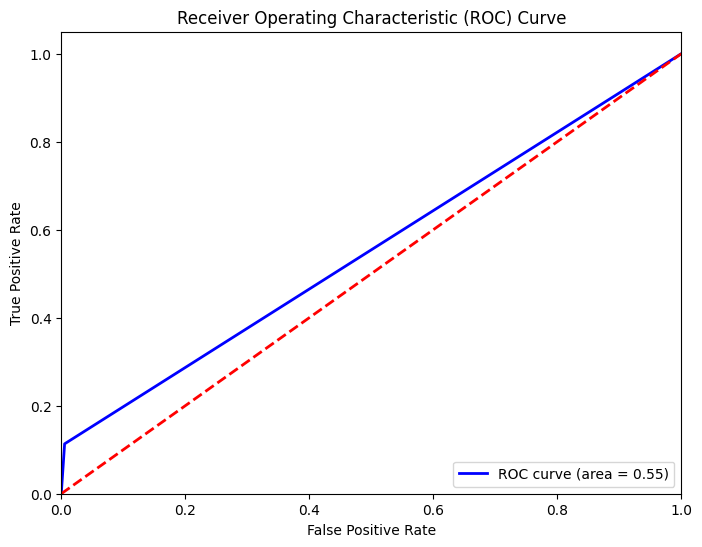

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## XGBoost (boosting)

In [93]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=42)
y_pred, accuracy, train_time = train_model(xgb)

result_no_duration['XGBoost'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result_no_duration)

{'Decision Tree': {'Accuracy': 0.8472168905950096, 'Training time (s)': 0.12879705429077148}, 'Random Forest': {'Accuracy': 0.9062060140754958, 'Training time (s)': 1.6471879482269287}, 'SVM': {'Accuracy': 0.9110684580934101, 'Training time (s)': 1.4665238857269287}, 'XGBoost': {'Accuracy': 0.9071017274472168, 'Training time (s)': 1.2782092094421387}}


In [94]:
confusion_matrix(y_test, y_pred)

array([[6968,  106],
       [ 620,  121]])

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7074
         1.0       0.53      0.16      0.25       741

    accuracy                           0.91      7815
   macro avg       0.73      0.57      0.60      7815
weighted avg       0.88      0.91      0.88      7815



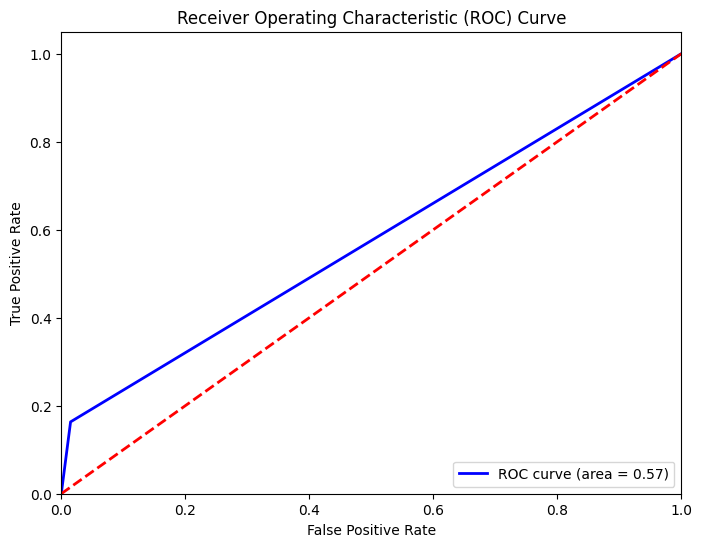

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Gradient Boost

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
y_pred, accuracy, train_time = train_model(gb)

result_no_duration['Gradient Boost'] = {'Accuracy':accuracy, 'Training time (s)':train_time}

print(result_no_duration)

{'Decision Tree': {'Accuracy': 0.8472168905950096, 'Training time (s)': 0.12879705429077148}, 'Random Forest': {'Accuracy': 0.9062060140754958, 'Training time (s)': 1.6471879482269287}, 'SVM': {'Accuracy': 0.9110684580934101, 'Training time (s)': 1.4665238857269287}, 'XGBoost': {'Accuracy': 0.9071017274472168, 'Training time (s)': 1.2782092094421387}, 'Gradient Boost': {'Accuracy': 0.910940499040307, 'Training time (s)': 2.584134340286255}}


In [98]:
confusion_matrix(y_test, y_pred)

array([[7015,   59],
       [ 637,  104]])

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      7074
         1.0       0.64      0.14      0.23       741

    accuracy                           0.91      7815
   macro avg       0.78      0.57      0.59      7815
weighted avg       0.89      0.91      0.88      7815



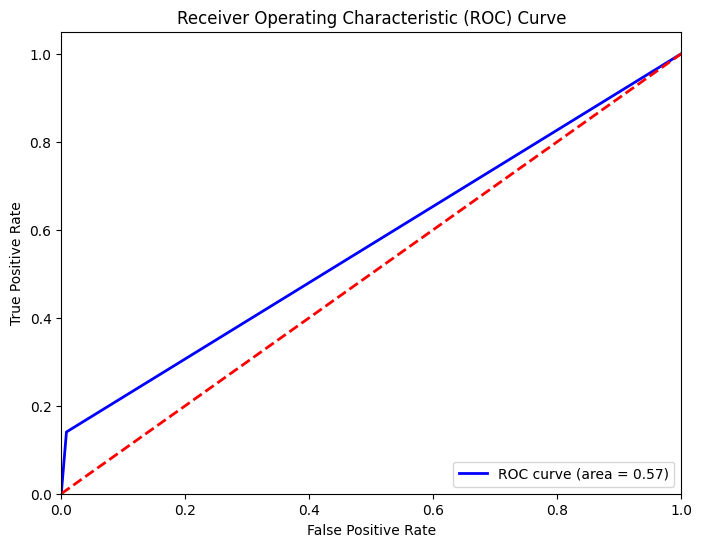

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [101]:
df_result = pd.DataFrame.from_dict(result_no_duration, orient='index')
df_result.sort_values(by='Accuracy', ascending=False)

,Accuracy,Training time (s)
SVM,0.911068,1.466524
Gradient Boost,0.910940,2.584134
XGBoost,0.907102,1.278209
Random Forest,0.906206,1.647188
Decision Tree,0.847217,0.128797


The models with duration features are more powerful than those without them. This difference can be attributed to various factors, such as the preprocessing stage or the model parameters utilized.

I will attempt to optimize the parameters through hyperparameter tuning to achieve the highest accuracy for the model without the duration feature.

# Hypertuning Params

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC()

param_grid = {
    'C' : [1, 0.1, 0.001, 0.0001, 0.00001, 0.000001],
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'random_state' : [42]
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 0.1, 0.001, 0.0001, 1e-05, 1e-06],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [42]},
             scoring='accuracy')

In [118]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}


In [120]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9113243761996161


In [119]:
from joblib import dump

dump(best_model, 'best_model_svm.joblib')

['best_model_svm.joblib']

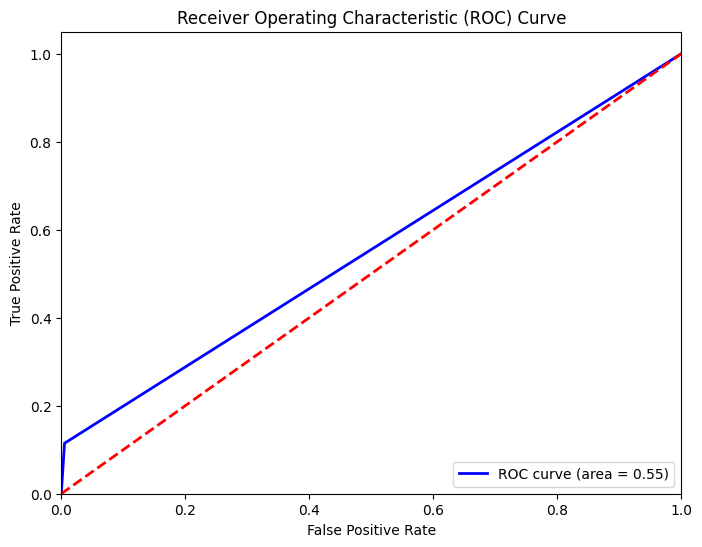

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

By employing this approach, we've observed an increase in accuracy; however, the ROC results still appear to be subpar